In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

# Load the data and Display structure,summary report.

In [2]:
df = pd.read_csv(r'D:\datasets\IOT-temp.csv')
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [4]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [5]:
df.shape

(97606, 5)

In [6]:
pd.set_option('display.max_columns', None)
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


# Check the attributes data types and Drop out unwanted columns like id , room_id.

In [7]:
df.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [8]:
df = df.drop(['id', 'room_id/id'], axis = 1)
df

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


# Check for missing values in any of the columns.

In [9]:
df.isnull().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

# Separate out date and time values of noted_date column

In [10]:
df['noted_date'] = pd.to_datetime(df['noted_date'])

df['date'] = df['noted_date'].dt.date
df['time'] = df['noted_date'].dt.time

df

,noted_date,temp,out/in,date,time
0,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
1,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
2,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
4,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00
...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97602,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97603,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00
97604,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00


##### dropping noted_date column because we separated the that column into two new columns so no need of that column any more

In [11]:
df = df.drop(['noted_date'], axis = 1)
df

,temp,out/in,date,time
0,29,In,2018-08-12,09:30:00
1,29,In,2018-08-12,09:30:00
2,41,Out,2018-08-12,09:29:00
3,41,Out,2018-08-12,09:29:00
4,31,In,2018-08-12,09:29:00
...,...,...,...,...
97601,31,In,2018-07-28,07:07:00
97602,31,In,2018-07-28,07:07:00
97603,31,In,2018-07-28,07:06:00
97604,31,In,2018-07-28,07:06:00


# Further separate date,month,year from date and store as separate columns. Display the complete data with new columns.

In [12]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df

,temp,out/in,date,time,year,month,day
0,29,In,2018-08-12,09:30:00,2018,8,12
1,29,In,2018-08-12,09:30:00,2018,8,12
2,41,Out,2018-08-12,09:29:00,2018,8,12
3,41,Out,2018-08-12,09:29:00,2018,8,12
4,31,In,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...
97601,31,In,2018-07-28,07:07:00,2018,7,28
97602,31,In,2018-07-28,07:07:00,2018,7,28
97603,31,In,2018-07-28,07:06:00,2018,7,28
97604,31,In,2018-07-28,07:06:00,2018,7,28


In [13]:
df = df.drop(['date'], axis = 1)
df

,temp,out/in,time,year,month,day
0,29,In,09:30:00,2018,8,12
1,29,In,09:30:00,2018,8,12
2,41,Out,09:29:00,2018,8,12
3,41,Out,09:29:00,2018,8,12
4,31,In,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,In,07:07:00,2018,7,28
97602,31,In,07:07:00,2018,7,28
97603,31,In,07:06:00,2018,7,28
97604,31,In,07:06:00,2018,7,28


### before plotting we sepreate oqt data in two different dataframes 

### Converting 'In' to '1' and 'Out' to '0'

In [14]:
df.replace('In', 0, inplace = True)
df.replace('Out', 1, inplace = True)

df

,temp,out/in,time,year,month,day
0,29,0,09:30:00,2018,8,12
1,29,0,09:30:00,2018,8,12
2,41,1,09:29:00,2018,8,12
3,41,1,09:29:00,2018,8,12
4,31,0,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,0,07:07:00,2018,7,28
97602,31,0,07:07:00,2018,7,28
97603,31,0,07:06:00,2018,7,28
97604,31,0,07:06:00,2018,7,28


In [15]:
df_in = df[df["out/in"] == 0]
df_out = df[df["out/in"] == 1]

#### 1 : based on Inside temperature

In [16]:
df_in.reset_index(drop = True)
df

,temp,out/in,time,year,month,day
0,29,0,09:30:00,2018,8,12
1,29,0,09:30:00,2018,8,12
2,41,1,09:29:00,2018,8,12
3,41,1,09:29:00,2018,8,12
4,31,0,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,0,07:07:00,2018,7,28
97602,31,0,07:07:00,2018,7,28
97603,31,0,07:06:00,2018,7,28
97604,31,0,07:06:00,2018,7,28


#### 2 : based on Outside temperature

In [17]:
df_out.reset_index(drop = True)
df

,temp,out/in,time,year,month,day
0,29,0,09:30:00,2018,8,12
1,29,0,09:30:00,2018,8,12
2,41,1,09:29:00,2018,8,12
3,41,1,09:29:00,2018,8,12
4,31,0,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,0,07:07:00,2018,7,28
97602,31,0,07:07:00,2018,7,28
97603,31,0,07:06:00,2018,7,28
97604,31,0,07:06:00,2018,7,28


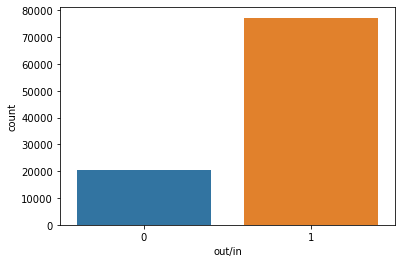

In [44]:
# Plot of count of Inside and Outside
sns.countplot(df['out/in']);

# Prepare boxplot of temprature.

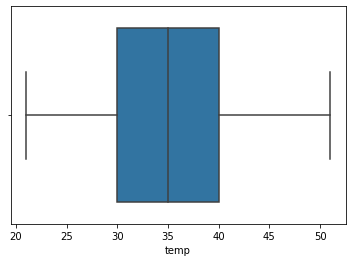

In [35]:
sns.boxplot(df['temp'])
plt.show()

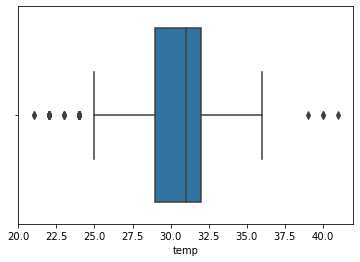

In [36]:
# Inside temperature 
sns.boxplot(df_in['temp'])
plt.show()

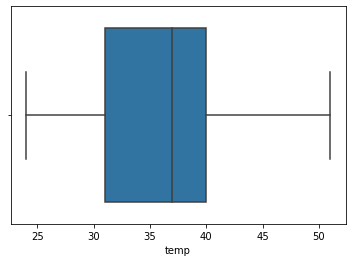

In [37]:
# Outside temperature 
sns.boxplot(df_out['temp'])
plt.show()

# Prepare barplot for in/out vs temperature.

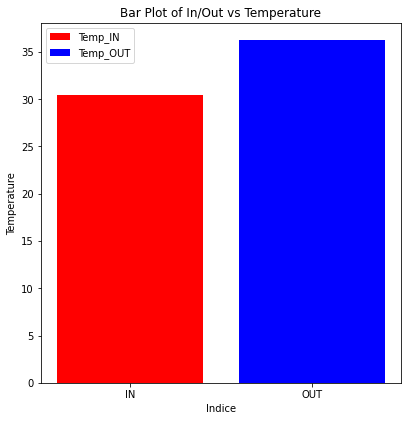

In [21]:
fig = plt.figure(figsize=(5,5));
ax = fig.add_axes([0,0,1,1])

x = ['IN', 'OUT']
y_in = df_in['temp'].mean()
y_out = df_out['temp'].mean()

ax.bar(x[0], y_in, color = 'red')
ax.bar(x[1], y_out, color = 'blue')

ax.set_xlabel('Indice')
ax.set_ylabel('Temperature')
ax.legend(["Temp_IN", "Temp_OUT"])
ax.set_title('Bar Plot of In/Out vs Temperature')
plt.show()

# OR 

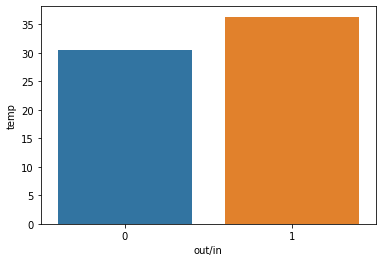

In [38]:
sns.barplot(df['out/in'],df['temp'])
plt.show()